# Geospatial Data
In this section, we will practice manipulating and plotting geospatial data.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Our Dataset: Countries!
Run the cell below to see the countries GeoDataFrame from yesterday's lecture, which you'll be working with today.

In [3]:
countries = gpd.read_file("ne_110m_admin_0_countries.shp")
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


## Group Activity

Write a function called `highlight_population` that takes a countries GeoDataFrame and a continent name as input and returns a plot that colors the specified continent based on its population. Instead of plotting raw population numbers, the color should represent the continent's population as a percentage of the global population. To do this, you should add a new column to the dataset called `pop_ratio`.

The plot should show all countries outside of the continent as grey (color being `#EEEEEE` and edgecolor `#FFFFFF`). The plot should also include a legend. The legend should be scaled so the minimum value is 0 (`vmin=0`) and the maximum value is 1 (`vmax=1`). Finally, make sure the figsize is set to `figsize=(15, 10)`.

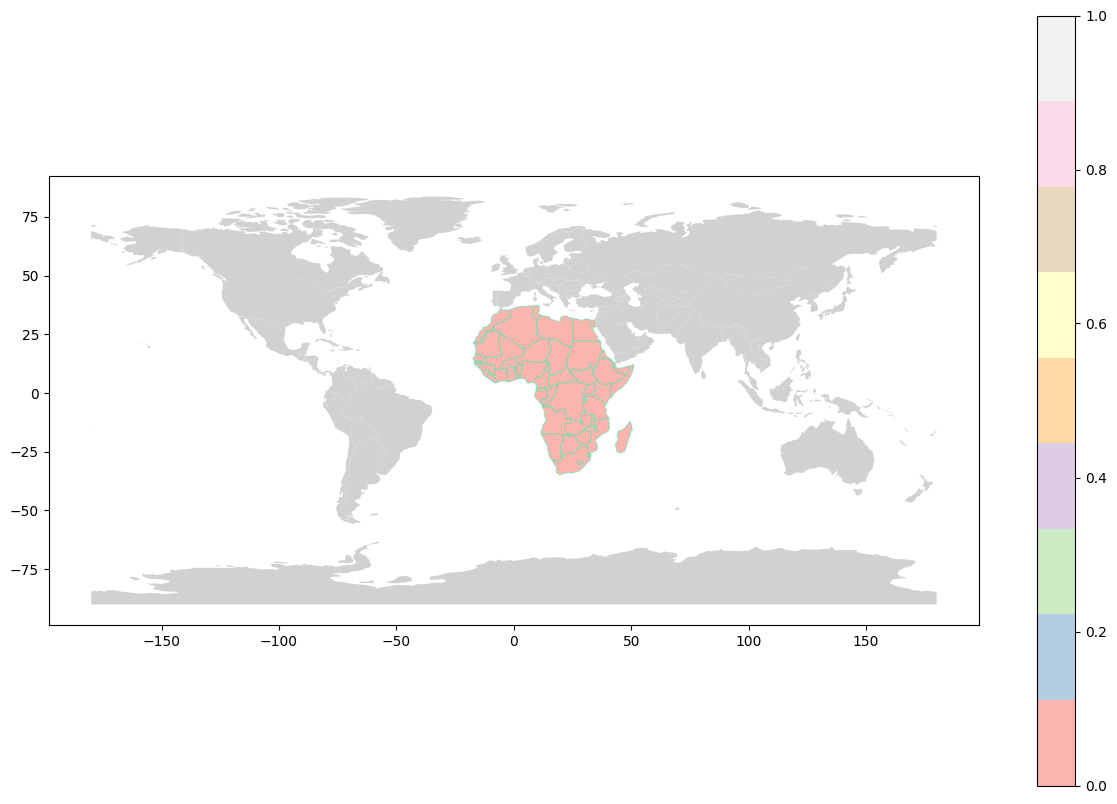

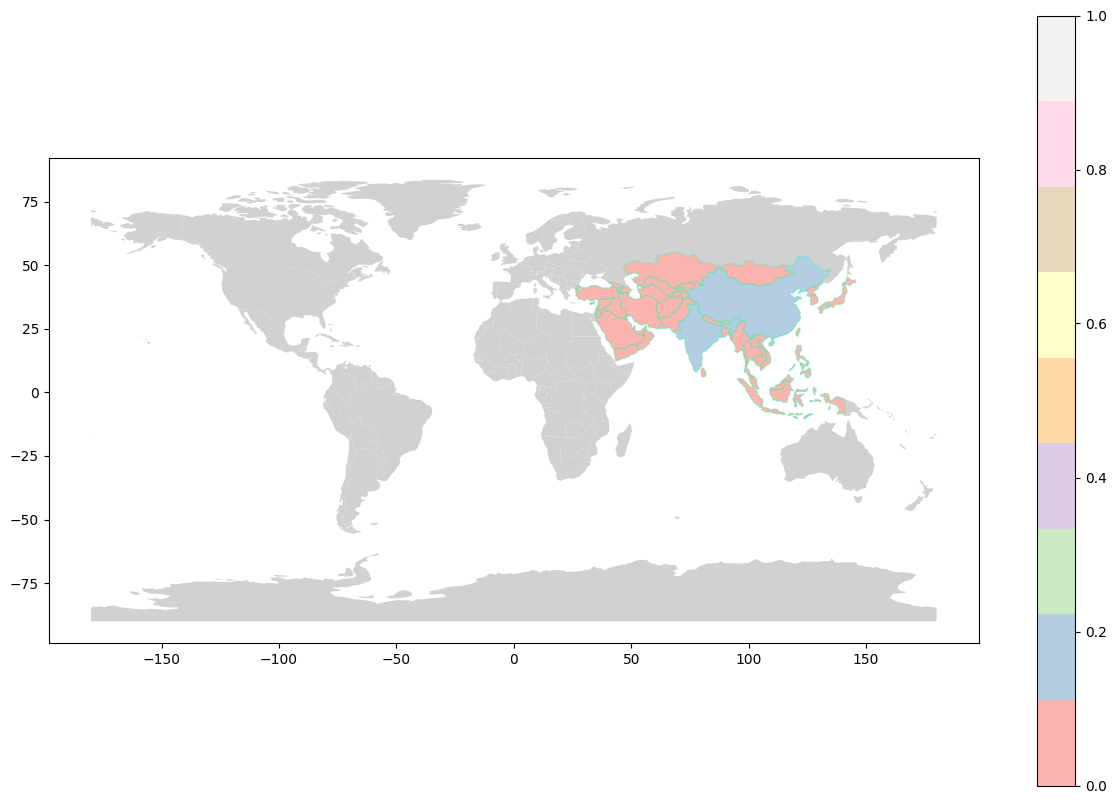

In [ ]:
def highlight_population(countries, continent):
    """Given a GeoDataFrame representing world data and a string continent name,
    returns a plot that colors the inputted continent
    as a ratio of gloabal population"""

    
    # TODO: write this function!
    total_pop = countries["POP_EST"].sum()

    countries["pop_ratio"] = countries["POP_EST"]/total_pop
    continent_data = countries[countries["CONTINENT"] == continent]

    fig, ax = plt.subplots(figsize=(15, 10))
    countries.plot(ax = ax, color="#D1D1D1")
    continent_data.plot(ax=ax, vmin= 0, vmax = 1, column="pop_ratio", legend=True, edgecolor = "#3FEEAB63", cmap = "Pastel1")
    

highlight_population(countries, "Africa")
highlight_population(countries, "Asia")

Write a function called `gdp_and_population_ratio` that takes a countries GeoDataFrame as input and returns an `Axes` object with two subplots. The first subplot should color each continent based on its percentage of the world's population, while the second should color each continent based on its percentage of the world’s GDP. To achieve this, you may add new columns to the dataset called `pop_ratio` and `gdp_ratio`.

The plot should also include a legend. The legend should be scaled so the minimum value is 0 (`vmin=0`) and the maximum value is 1 (`vmax=1`). Finally, make sure the figsize is set to `figsize=(15, 10)`!

*HINT: In order to find which columns you might want to use, you can use the `list(countries.columns)` properties to inspect what columns are in the dataset.*

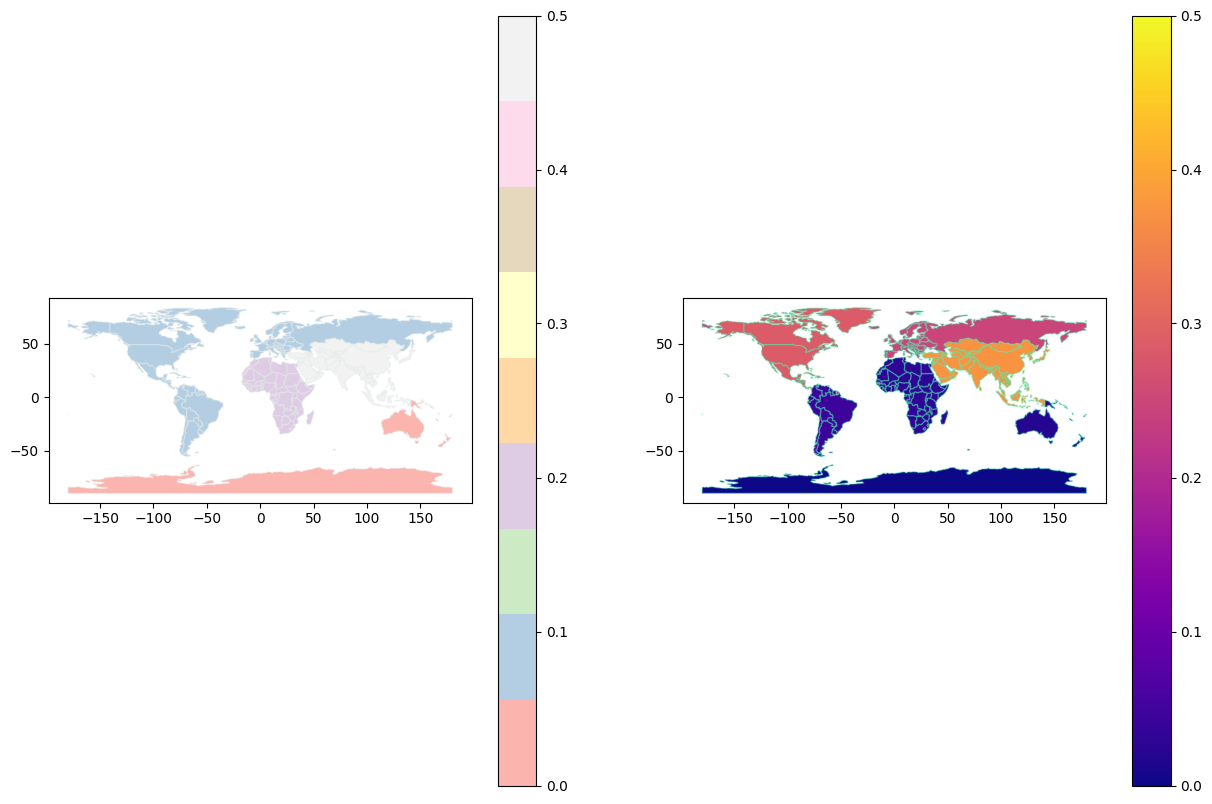

In [37]:
def gdp_and_population_ratio(countries):
    """Given a GeoDataFrame representing world data,
    returns a two figure plot that shows world GDP and
    population ratios"""

    # TODO: write this function!
    country_pop = countries.groupby("CONTINENT")["POP_EST"].sum()
    country_gdp = countries.groupby("CONTINENT")["GDP_MD"].sum()

    cont_pop_ratio = country_pop / country_pop.sum()
    cont_gdp_ratio = country_gdp / country_gdp.sum()


    df = countries.copy()
    df["pop_ratio"] = df["CONTINENT"].map(cont_pop_ratio)
    df["gdp_ratio"] = df["CONTINENT"].map(cont_gdp_ratio)


    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 10))
    #countries.plot(ax = ax1, color="#D1D1D1")
    df.plot(ax=ax1, vmin= 0, vmax = 0.5, column="pop_ratio", legend=True, edgecolor = "#E3EBE862", cmap = "Pastel1")
    df.plot(ax=ax2, vmin= 0, vmax = 0.5, column="gdp_ratio", legend=True, edgecolor = "#3FEEAB63", cmap = 'plasma')


gdp_and_population_ratio(countries)